### Import Data and Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn as sk

#### Dataframe 1: Data information 

In [3]:
df1 = pd.read_excel(r'/Users/teslim/OneDrive/14_project_mutual_data_3.xls',sheet_name="data1")
df1.head()

,Fund_id,Alpha,Sharpe_Ratio,Treynor_Ratio,NAV,Fund Age,Expense Ratio,Manager Tenure,Fund Size,Returns_2019,Returns_2020,Returns_2021,Returns_2022,Returns_2023,Beta,RiskFreeRate,MarkertReturnRate,StandardDeviation,average_returns
0,Fund_1,-0.107624,-1.780486,-0.120472,537.77,36.38,1.41,8.33,523.84,0.043766,-0.136608,0.075317,-0.082449,-0.188842,0.77,0.035,0.0543,0.0521,-0.057763
1,Fund_2,-0.025827,-0.339249,-0.016079,199.24,25.78,1.05,0.92,780.56,0.070619,-0.105941,0.124147,0.025232,0.002253,0.73,0.035,0.0543,0.0346,0.023262
2,Fund_3,-0.081754,-1.403464,-0.062454,164.00,39.84,1.99,2.00,160.86,-0.031531,-0.110271,0.056090,-0.027476,-0.024083,1.00,0.035,0.0543,0.0445,-0.027454
3,Fund_4,-0.012588,0.114523,0.005909,117.62,18.06,3.51,18.67,117.62,0.063254,-0.092924,0.215339,0.025905,-0.008802,0.94,0.035,0.0543,0.0485,0.040554
4,Fund_5,-0.089281,-1.201978,-0.068230,53.98,56.31,6.85,7.42,5315.00,-0.013316,-0.239892,0.078313,-0.005687,0.007610,1.02,0.035,0.0543,0.0579,-0.034595


array([[<Axes: title={'center': 'Alpha'}>,
        <Axes: title={'center': 'Sharpe_Ratio'}>],
       [<Axes: title={'center': 'NAV'}>,
        <Axes: title={'center': 'Fund Age'}>]], dtype=object)

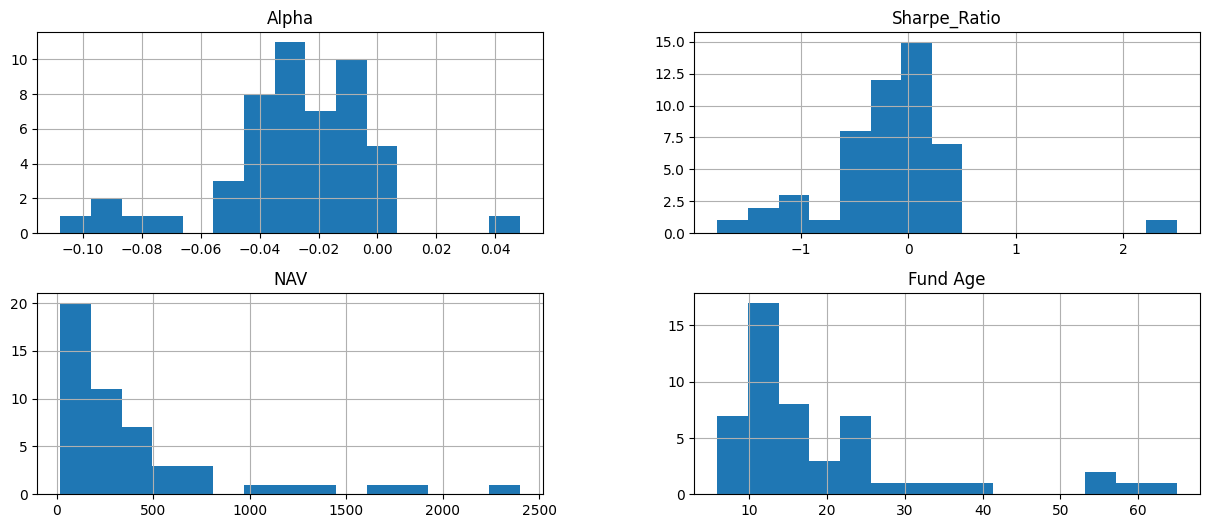

In [9]:
# charting an insteresting column


char_col = ["Alpha", "Sharpe_Ratio", "NAV", "Fund Age"]
df1[char_col].hist(bins=15, figsize=(15, 6), layout=(2, 2))

In [69]:
# cleaning the column headers 
def clean_column_headers(df):
    """
    Cleans the column headers of a DataFrame by:
    1. Converting to lowercase.
    2. Stripping leading and trailing whitespace.
    3. Replacing spaces with underscores.
    
    Parameters:
    df (pd.DataFrame): The DataFrame whose columns need to be cleaned.
    
    Returns:
    pd.DataFrame: The DataFrame with cleaned column headers.
    """
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.strip()
    return df

# calling the function
df1 = clean_column_headers(df1)
df1.head()

,fund_id,alpha,sharpe_ratio,treynor_ratio,nav,fund age,expense ratio,manager tenure,fund size,returns_2019,returns_2020,returns_2021,returns_2022,returns_2023,beta,riskfreerate,markertreturnrate,standarddeviation,average_returns
0,Fund_1,-0.107624,-1.780486,-0.120472,537.77,36.38,1.41,8.33,523.84,0.043766,-0.136608,0.075317,-0.082449,-0.188842,0.77,0.035,0.0543,0.0521,-0.057763
1,Fund_2,-0.025827,-0.339249,-0.016079,199.24,25.78,1.05,0.92,780.56,0.070619,-0.105941,0.124147,0.025232,0.002253,0.73,0.035,0.0543,0.0346,0.023262
2,Fund_3,-0.081754,-1.403464,-0.062454,164.00,39.84,1.99,2.00,160.86,-0.031531,-0.110271,0.056090,-0.027476,-0.024083,1.00,0.035,0.0543,0.0445,-0.027454
3,Fund_4,-0.012588,0.114523,0.005909,117.62,18.06,3.51,18.67,117.62,0.063254,-0.092924,0.215339,0.025905,-0.008802,0.94,0.035,0.0543,0.0485,0.040554
4,Fund_5,-0.089281,-1.201978,-0.068230,53.98,56.31,6.85,7.42,5315.00,-0.013316,-0.239892,0.078313,-0.005687,0.007610,1.02,0.035,0.0543,0.0579,-0.034595


In [70]:
# set index 
df1.set_index("fund_id").head()

,alpha,sharpe_ratio,treynor_ratio,nav,fund age,expense ratio,manager tenure,fund size,returns_2019,returns_2020,returns_2021,returns_2022,returns_2023,beta,riskfreerate,markertreturnrate,standarddeviation,average_returns
fund_id,,,,,,,,,,,,,,,,,,
Fund_1,-0.107624,-1.780486,-0.120472,537.77,36.38,1.41,8.33,523.84,0.043766,-0.136608,0.075317,-0.082449,-0.188842,0.77,0.035,0.0543,0.0521,-0.057763
Fund_2,-0.025827,-0.339249,-0.016079,199.24,25.78,1.05,0.92,780.56,0.070619,-0.105941,0.124147,0.025232,0.002253,0.73,0.035,0.0543,0.0346,0.023262
Fund_3,-0.081754,-1.403464,-0.062454,164.00,39.84,1.99,2.00,160.86,-0.031531,-0.110271,0.056090,-0.027476,-0.024083,1.00,0.035,0.0543,0.0445,-0.027454
Fund_4,-0.012588,0.114523,0.005909,117.62,18.06,3.51,18.67,117.62,0.063254,-0.092924,0.215339,0.025905,-0.008802,0.94,0.035,0.0543,0.0485,0.040554
Fund_5,-0.089281,-1.201978,-0.068230,53.98,56.31,6.85,7.42,5315.00,-0.013316,-0.239892,0.078313,-0.005687,0.007610,1.02,0.035,0.0543,0.0579,-0.034595


In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fund_id            50 non-null     object 
 1   alpha              50 non-null     float64
 2   sharpe_ratio       50 non-null     float64
 3   treynor_ratio      50 non-null     float64
 4   nav                50 non-null     float64
 5   fund age           50 non-null     float64
 6   expense ratio      50 non-null     float64
 7   manager tenure     50 non-null     float64
 8   fund size          50 non-null     float64
 9   returns_2019       50 non-null     float64
 10  returns_2020       50 non-null     float64
 11  returns_2021       50 non-null     float64
 12  returns_2022       50 non-null     float64
 13  returns_2023       50 non-null     float64
 14  beta               50 non-null     float64
 15  riskfreerate       50 non-null     float64
 16  markertreturnrate  50 non-nu

#### Dataframe 2: Monthly Returns 

In [56]:
# Load the data
#df2 = pd.read_excel(r'/Users/teslim/OneDrive/14_project_mutual_data_3.xls', sheet_name='data2')


,Fund_id,Year,Returns,NAV,fund_age,expenses_ratio,manager_tenure,fund_size
0,1,2019,0.006978,537.77,36.378082,1.41,8.33,523.84
1,1,2019,-0.004175,537.77,36.378082,1.41,8.33,523.84
2,1,2019,0.031053,537.77,36.378082,1.41,8.33,523.84
3,1,2019,-0.014660,537.77,36.378082,1.41,8.33,523.84
4,1,2019,0.006824,537.77,36.378082,1.41,8.33,523.84
...,...,...,...,...,...,...,...,...
2995,9,2023,0.026710,1005.00,25.386301,3.47,4.25,1050.01
2996,9,2023,-0.039509,1005.00,25.386301,3.47,4.25,1050.01
2997,9,2023,0.022538,1005.00,25.386301,3.47,4.25,1050.01
2998,9,2023,0.026621,1005.00,25.386301,3.47,4.25,1050.01


In [57]:
# cleaning the column headers 
def clean_column_headers(df):
    """
    Cleans the column headers of a DataFrame by:
    1. Converting to lowercase.
    2. Stripping leading and trailing whitespace.
    3. Replacing spaces with underscores.
    
    Parameters:
    df (pd.DataFrame): The DataFrame whose columns need to be cleaned.
    
    Returns:
    pd.DataFrame: The DataFrame with cleaned column headers.
    """
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.strip()
    return df

# calling the function
df1 = clean_column_headers(df2)
df2.head()

,fund_id,year,returns,nav,fund_age,expenses_ratio,manager_tenure,fund_size
0,1,2019,0.006978,537.77,36.378082,1.41,8.33,523.84
1,1,2019,-0.004175,537.77,36.378082,1.41,8.33,523.84
2,1,2019,0.031053,537.77,36.378082,1.41,8.33,523.84
3,1,2019,-0.014660,537.77,36.378082,1.41,8.33,523.84
4,1,2019,0.006824,537.77,36.378082,1.41,8.33,523.84


### Multi-Year Performance Persistence

#### Annual performance measure 
_____

<Axes: >

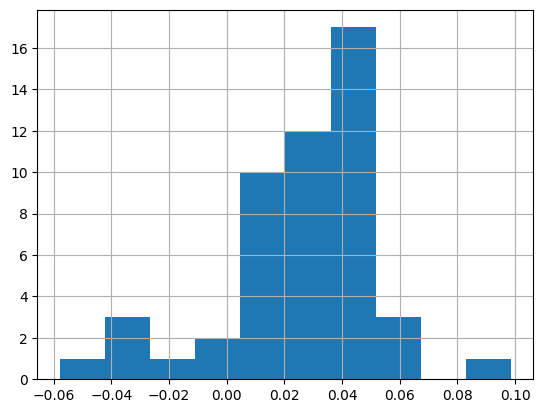

In [73]:
df1.get('average_returns').hist()

#### Alpha measure 
____

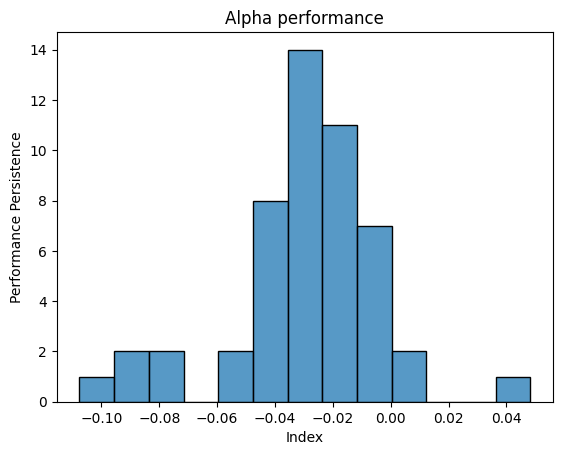

In [74]:
sns.histplot(data=df1.get("alpha"))
plt.xlabel('Index')
plt.ylabel('Performance Persistence')
plt.title('Alpha performance')
plt.show()

### sharpe

<Axes: >

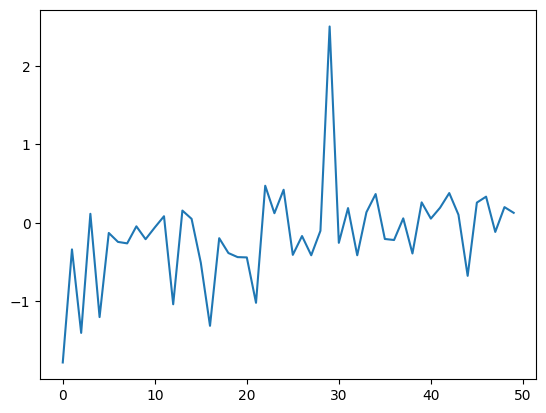

In [75]:
df1.get("sharpe_ratio").plot()

### beta 

<Axes: >

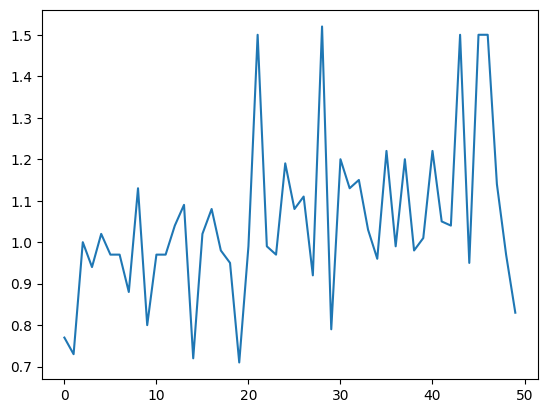

In [76]:
df1.get("beta").plot()

### Sortino ratio

<Axes: >

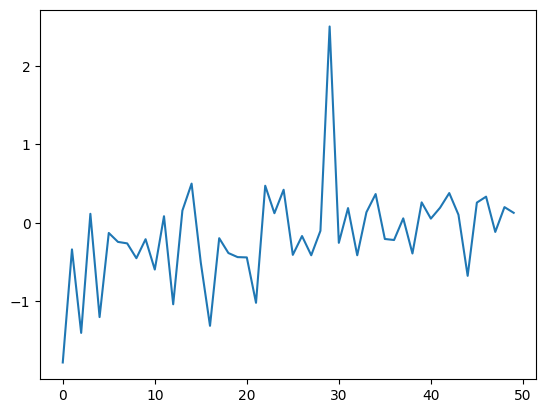

In [77]:
sortino = (df1['average_returns']-df1['riskfreerate'])/ df1['standarddeviation']
sortino.plot()


### information ratio

<Axes: >

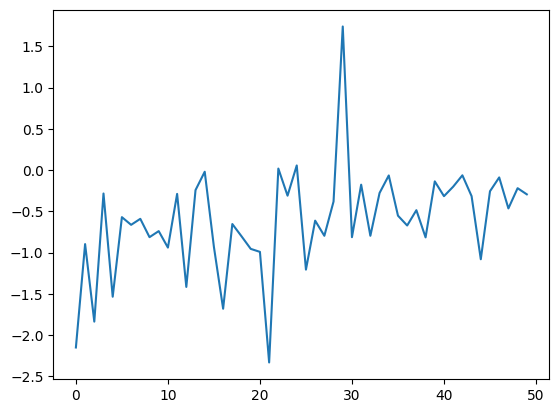

In [78]:
information_ratio = (df1['average_returns']-df1['markertreturnrate'])/ df1['standarddeviation']
information_ratio.plot()

# all data 

In [79]:
df1.head()

,fund_id,alpha,sharpe_ratio,treynor_ratio,nav,fund age,expense ratio,manager tenure,fund size,returns_2019,returns_2020,returns_2021,returns_2022,returns_2023,beta,riskfreerate,markertreturnrate,standarddeviation,average_returns
0,Fund_1,-0.107624,-1.780486,-0.120472,537.77,36.38,1.41,8.33,523.84,0.043766,-0.136608,0.075317,-0.082449,-0.188842,0.77,0.035,0.0543,0.0521,-0.057763
1,Fund_2,-0.025827,-0.339249,-0.016079,199.24,25.78,1.05,0.92,780.56,0.070619,-0.105941,0.124147,0.025232,0.002253,0.73,0.035,0.0543,0.0346,0.023262
2,Fund_3,-0.081754,-1.403464,-0.062454,164.00,39.84,1.99,2.00,160.86,-0.031531,-0.110271,0.056090,-0.027476,-0.024083,1.00,0.035,0.0543,0.0445,-0.027454
3,Fund_4,-0.012588,0.114523,0.005909,117.62,18.06,3.51,18.67,117.62,0.063254,-0.092924,0.215339,0.025905,-0.008802,0.94,0.035,0.0543,0.0485,0.040554
4,Fund_5,-0.089281,-1.201978,-0.068230,53.98,56.31,6.85,7.42,5315.00,-0.013316,-0.239892,0.078313,-0.005687,0.007610,1.02,0.035,0.0543,0.0579,-0.034595


In [80]:
performance_persistence = df1[['alpha','sharpe_ratio','treynor_ratio', 'average_returns', 'beta' ]]
performance_persistence.head()

,alpha,sharpe_ratio,treynor_ratio,average_returns,beta
0,-0.107624,-1.780486,-0.120472,-0.057763,0.77
1,-0.025827,-0.339249,-0.016079,0.023262,0.73
2,-0.081754,-1.403464,-0.062454,-0.027454,1.00
3,-0.012588,0.114523,0.005909,0.040554,0.94
4,-0.089281,-1.201978,-0.068230,-0.034595,1.02


In [81]:
# combine the sharpe, and sortino, and information ratio
sortino.head()

0   -1.780486
1   -0.339249
2   -1.403464
3    0.114523
4   -1.201978
dtype: float64

In [82]:
information_ratio.head()

0   -2.150927
1   -0.897053
2   -1.837172
3   -0.283415
4   -1.535311
dtype: float64

In [88]:
# combine the sharpe, and sortino, and information ratio
merged_df = pd.concat([sortino,information_ratio,performance_persistence,df1["fund_id"]], axis=1)
merged_df.head()

,0,1,alpha,sharpe_ratio,treynor_ratio,average_returns,beta,fund_id
0,-1.780486,-2.150927,-0.107624,-1.780486,-0.120472,-0.057763,0.77,Fund_1
1,-0.339249,-0.897053,-0.025827,-0.339249,-0.016079,0.023262,0.73,Fund_2
2,-1.403464,-1.837172,-0.081754,-1.403464,-0.062454,-0.027454,1.00,Fund_3
3,0.114523,-0.283415,-0.012588,0.114523,0.005909,0.040554,0.94,Fund_4
4,-1.201978,-1.535311,-0.089281,-1.201978,-0.068230,-0.034595,1.02,Fund_5


In [89]:
# Rename the column '0' to 'average_returns'
merged_df.rename(columns={0:'sortino_ratio', 1:"information_ratio"}, inplace=True,)
merged_df.set_index("fund_id")

# Display the first few rows of the merged DataFrame
merged_df.head()

,sortino_ratio,information_ratio,alpha,sharpe_ratio,treynor_ratio,average_returns,beta,fund_id
0,-1.780486,-2.150927,-0.107624,-1.780486,-0.120472,-0.057763,0.77,Fund_1
1,-0.339249,-0.897053,-0.025827,-0.339249,-0.016079,0.023262,0.73,Fund_2
2,-1.403464,-1.837172,-0.081754,-1.403464,-0.062454,-0.027454,1.00,Fund_3
3,0.114523,-0.283415,-0.012588,0.114523,0.005909,0.040554,0.94,Fund_4
4,-1.201978,-1.535311,-0.089281,-1.201978,-0.068230,-0.034595,1.02,Fund_5


In [86]:
# set the fund_id as the index
merged_df.set_index("fund_id").head()

,sortino_ratio,information_ratio,alpha,sharpe_ratio,treynor_ratio,average_returns,beta
fund_id,,,,,,,
Fund_1,-1.780486,-2.150927,-0.107624,-1.780486,-0.120472,-0.057763,0.77
Fund_2,-0.339249,-0.897053,-0.025827,-0.339249,-0.016079,0.023262,0.73
Fund_3,-1.403464,-1.837172,-0.081754,-1.403464,-0.062454,-0.027454,1.00
Fund_4,0.114523,-0.283415,-0.012588,0.114523,0.005909,0.040554,0.94
Fund_5,-1.201978,-1.535311,-0.089281,-1.201978,-0.068230,-0.034595,1.02


In [92]:
# calculate the summary statitisics
summary_statistics=merged_df.describe()
# Save the summary statistics to a CSV file
# summary_statistics.to_csv('summary_statistics.csv', index=True)
summary_statistics

,sortino_ratio,information_ratio,alpha,sharpe_ratio,treynor_ratio,average_returns,beta
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,-0.166301,-0.618135,-0.028944,-0.156435,-0.008971,0.026271,1.047400
std,0.634450,0.642940,0.026457,0.624054,0.029275,0.026600,0.198266
min,-1.780486,-2.332703,-0.107624,-1.780486,-0.120472,-0.057763,0.710000
25%,-0.414127,-0.876690,-0.036651,-0.404526,-0.018183,0.017563,0.962500
50%,-0.182672,-0.580477,-0.027837,-0.123130,-0.006992,0.027515,1.005000
75%,0.150437,-0.261282,-0.013320,0.132641,0.006809,0.042242,1.130000
max,2.502051,1.742209,0.048305,2.502051,0.080446,0.098552,1.520000


array([[<Axes: title={'center': 'sortino_ratio'}>,
        <Axes: title={'center': 'information_ratio'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'sharpe_ratio'}>,
        <Axes: title={'center': 'treynor_ratio'}>,
        <Axes: title={'center': 'average_returns'}>],
       [<Axes: title={'center': 'beta'}>, <Axes: >, <Axes: >]],
      dtype=object)

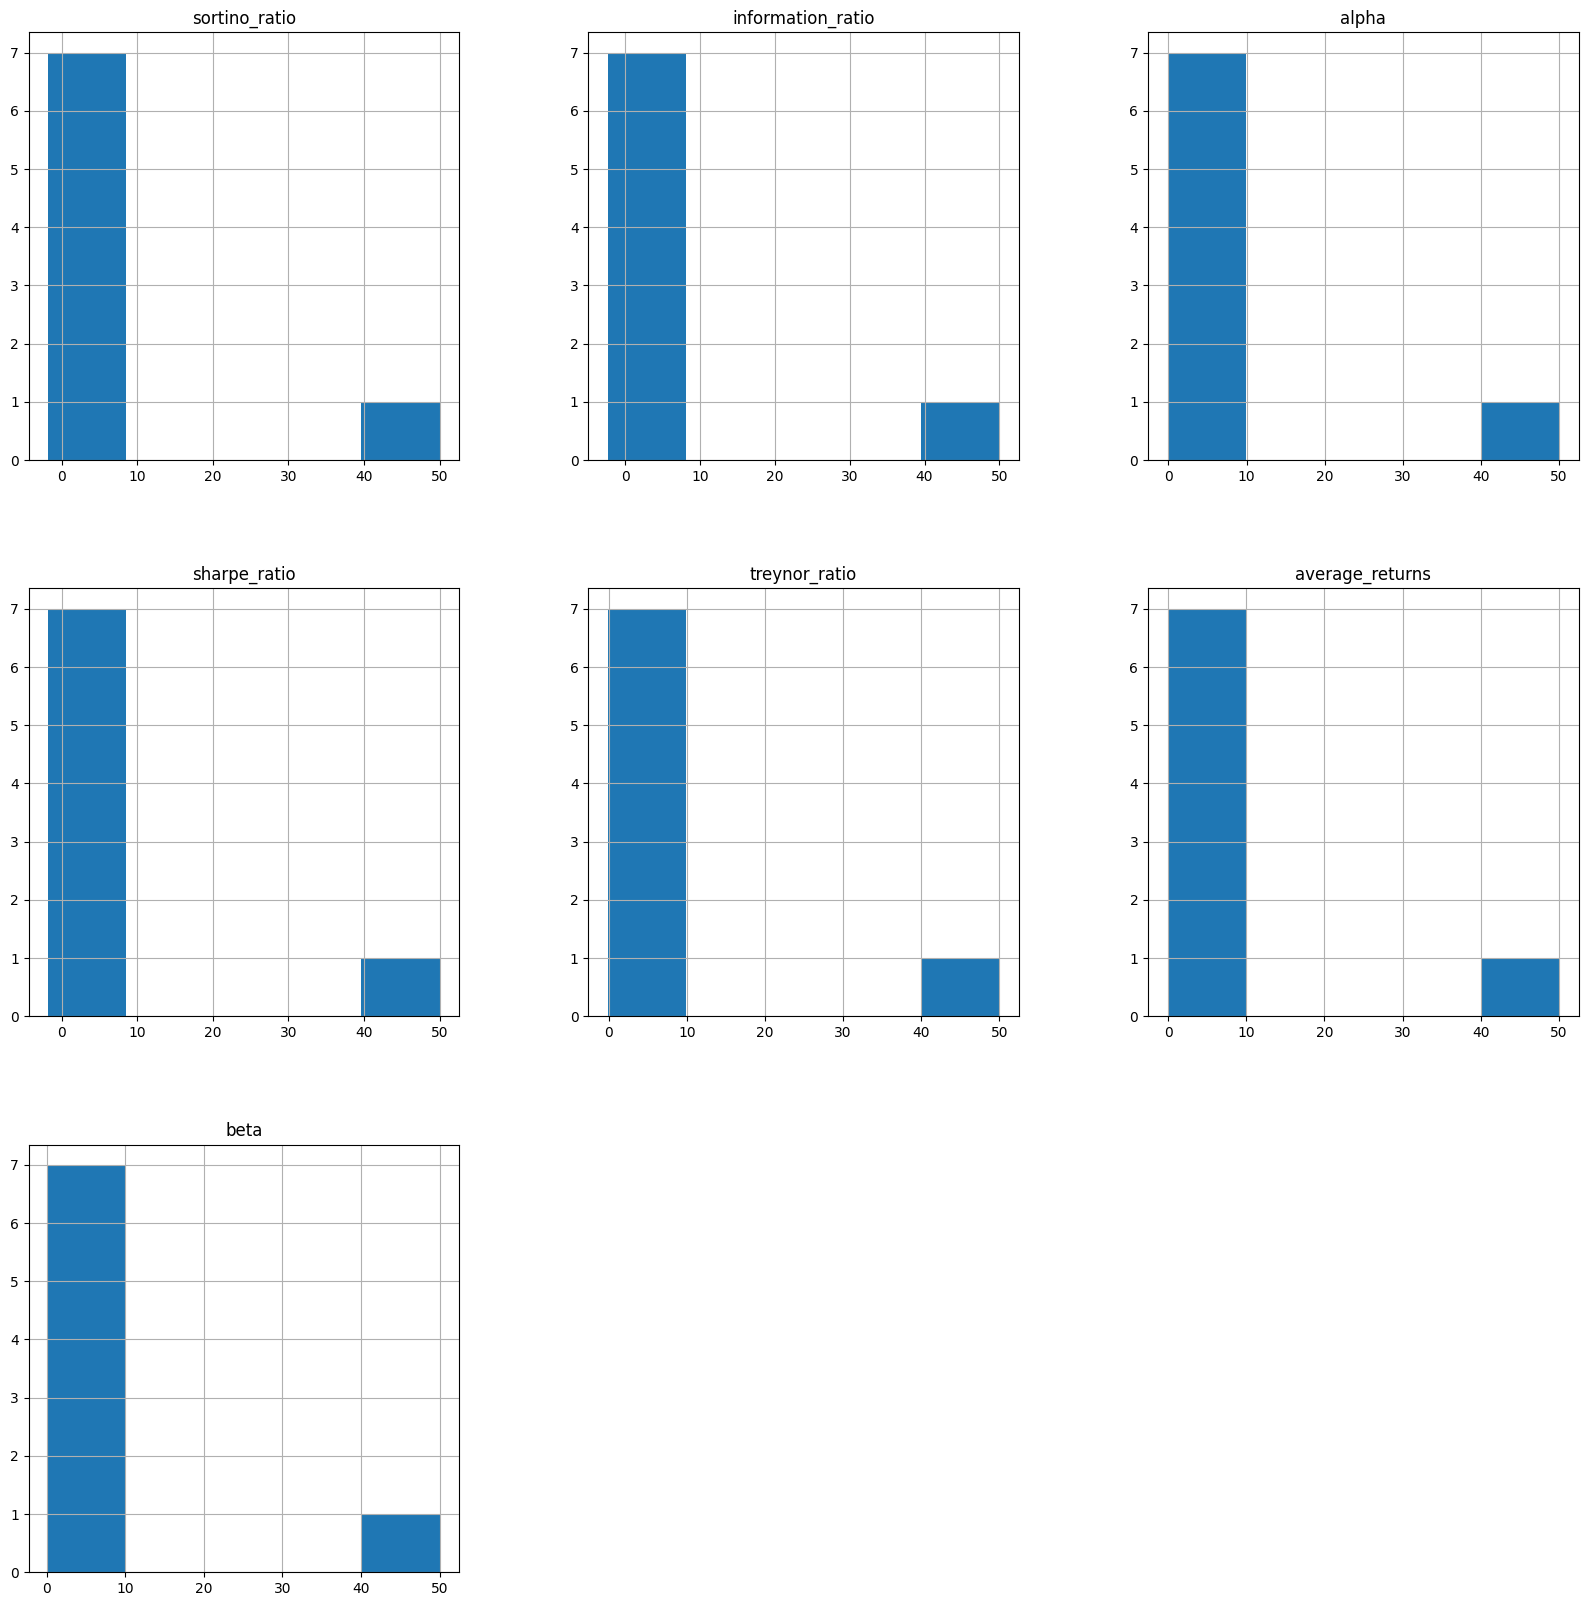

In [104]:
summary_statistics.hist(bins=5, figsize=(20,20))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create DataFrame
data = {
    'sortino_ratio': [-1.780486, -0.339249, -1.403464, 0.114523, -1.201978],
    'information_ratio': [-2.150927, -0.897053, -1.837172, -0.283415, -1.535311],
    'alpha': [-0.107624, -0.025827, -0.081754, -0.012588, -0.089281],
    'sharpe_ratio': [-1.780486, -0.339249, -1.403464, 0.114523, -1.201978],
    'treynor_ratio': [-0.120472, -0.016079, -0.062454, 0.005909, -0.068230]
}

merged_df = pd.DataFrame(data)

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df)
plt.title('Box Plot of Financial Metrics')
plt.xticks(rotation=90)
plt.yticks([])  # Remove y-axis ticks
plt.show()

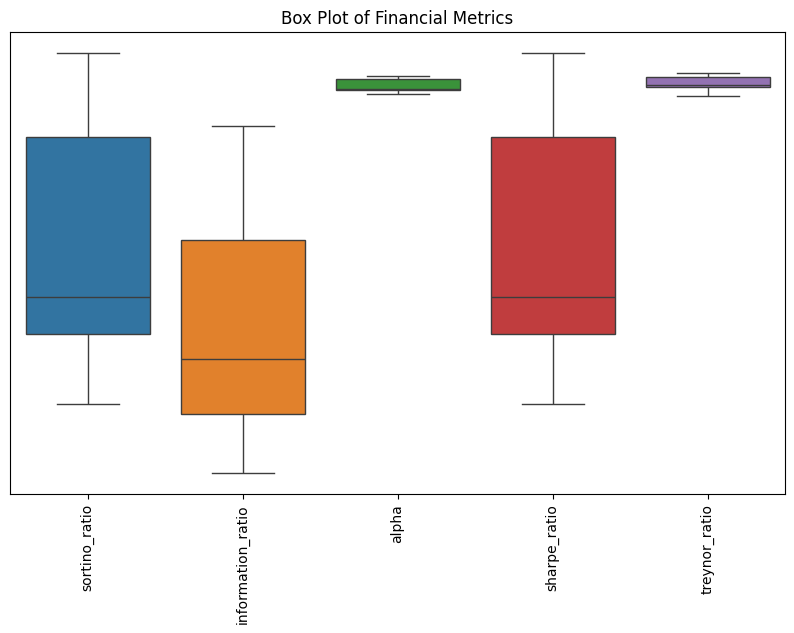

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create DataFrame
data = {
    'sortino_ratio': [-1.780486, -0.339249, -1.403464, 0.114523, -1.201978],
    'information_ratio': [-2.150927, -0.897053, -1.837172, -0.283415, -1.535311],
    'alpha': [-0.107624, -0.025827, -0.081754, -0.012588, -0.089281],
    'sharpe_ratio': [-1.780486, -0.339249, -1.403464, 0.114523, -1.201978],
    'treynor_ratio': [-0.120472, -0.016079, -0.062454, 0.005909, -0.068230]
}

merged_df = pd.DataFrame(data)

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df)
plt.title('Box Plot of Financial Metrics')
plt.xticks(rotation=90)
plt.yticks([])  # Remove y-axis ticks
plt.show()

In [ ]:
merged_df_pivot = merged_df.pivot_table(values=['sortino_ratio','alpha', 'information_ratio','sharpe_ratio','treynor_ratio' ],columns='fund_id', fill_value=0)
merged_df_pivot

fund_id,Fund_1,Fund_10,Fund_11,Fund_12,Fund_13,Fund_14,Fund_15,Fund_16,Fund_17,Fund_18,...,Fund_46,Fund_47,Fund_48,Fund_49,Fund_5,Fund_50,Fund_6,Fund_7,Fund_8,Fund_9
alpha,-0.107624,-0.023060,-0.052215,-0.014387,-0.073152,-0.013484,0.004679,-0.042887,-0.089785,-0.027201,...,-0.019277,-0.013700,-0.028473,-0.009516,-0.089281,-0.010191,-0.024401,-0.029934,-0.032414,-0.045918
information_ratio,-2.150927,-0.739572,-0.939387,-0.288360,-1.416435,-0.242198,-0.019486,-0.932040,-1.680773,-0.653715,...,-0.256048,-0.088421,-0.464333,-0.218973,-1.535311,-0.293500,-0.570313,-0.663331,-0.590641,-0.812902
sharpe_ratio,-1.780486,-0.209353,-0.059597,0.083509,-1.038744,0.155740,0.049933,-0.508794,-1.313154,-0.196369,...,0.257250,0.332976,-0.116586,0.199682,-1.201978,0.126979,-0.129674,-0.243766,-0.262409,-0.045148
sortino_ratio,-1.780486,-0.209353,-0.595971,0.083509,-1.038744,0.155740,0.499331,-0.508794,-1.313154,-0.196369,...,0.257250,0.332976,-0.116586,0.199682,-1.201978,0.126979,-0.129674,-0.243766,-0.262409,-0.451479
treynor_ratio,-0.120472,-0.009526,-0.034529,0.004468,-0.051038,0.006930,0.025799,-0.022746,-0.063834,-0.008456,...,0.006448,0.010167,-0.005676,0.009490,-0.068230,0.007022,-0.005855,-0.011560,-0.017534,-0.021335


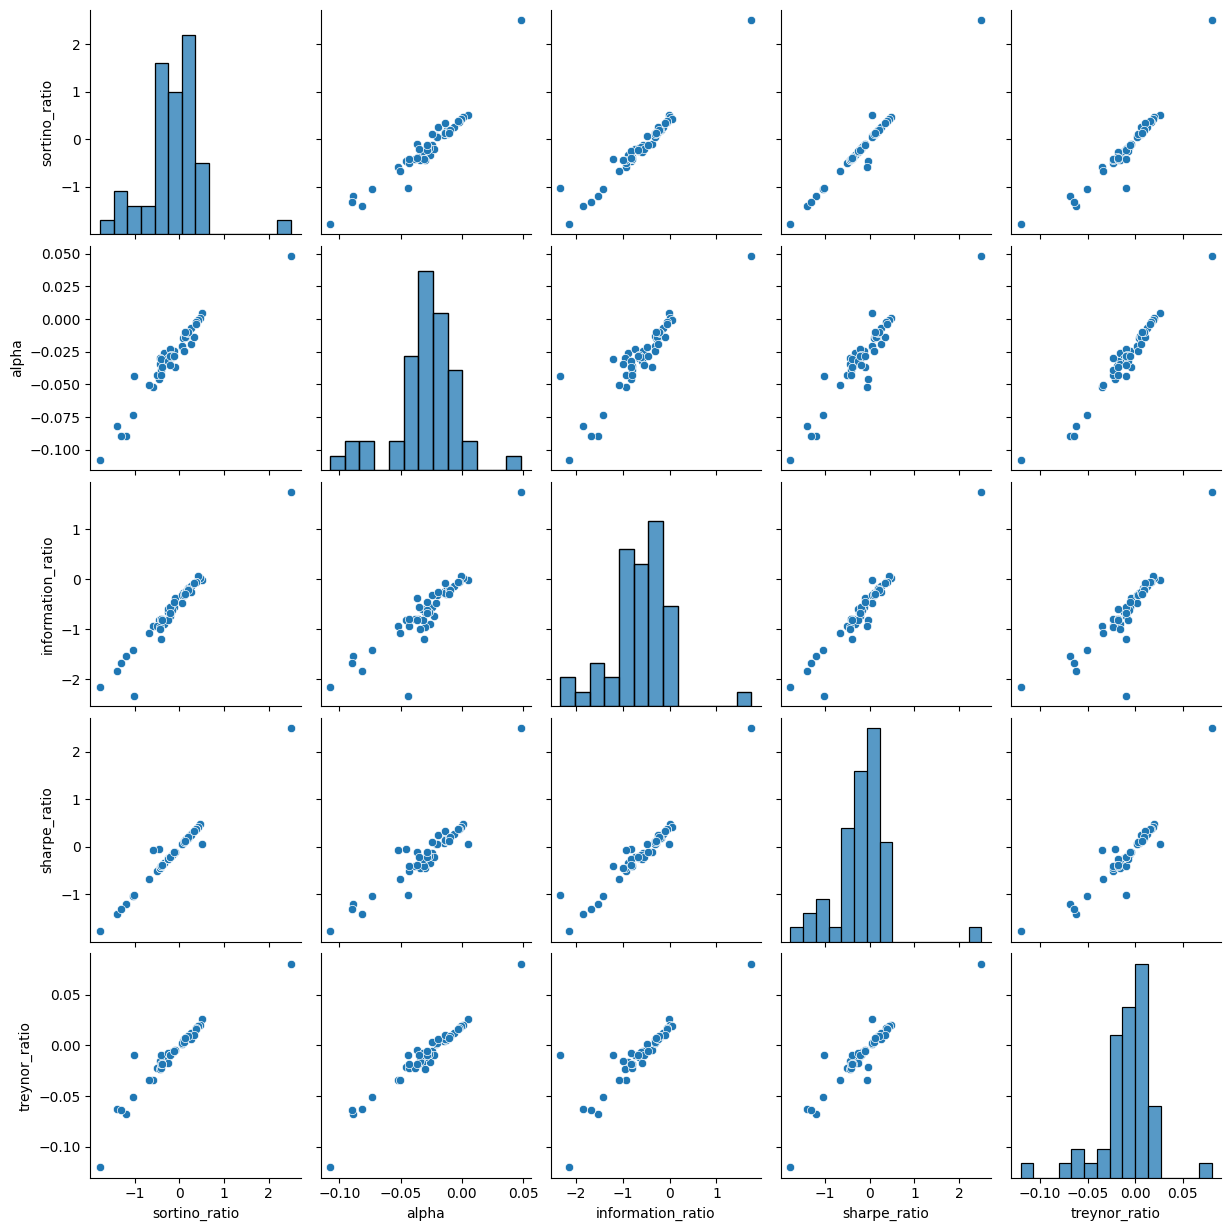

In [ ]:
import seaborn
seaborn.pairplot(merged_df, vars=['sortino_ratio','alpha', 'information_ratio','sharpe_ratio','treynor_ratio' ], kind='scatter')

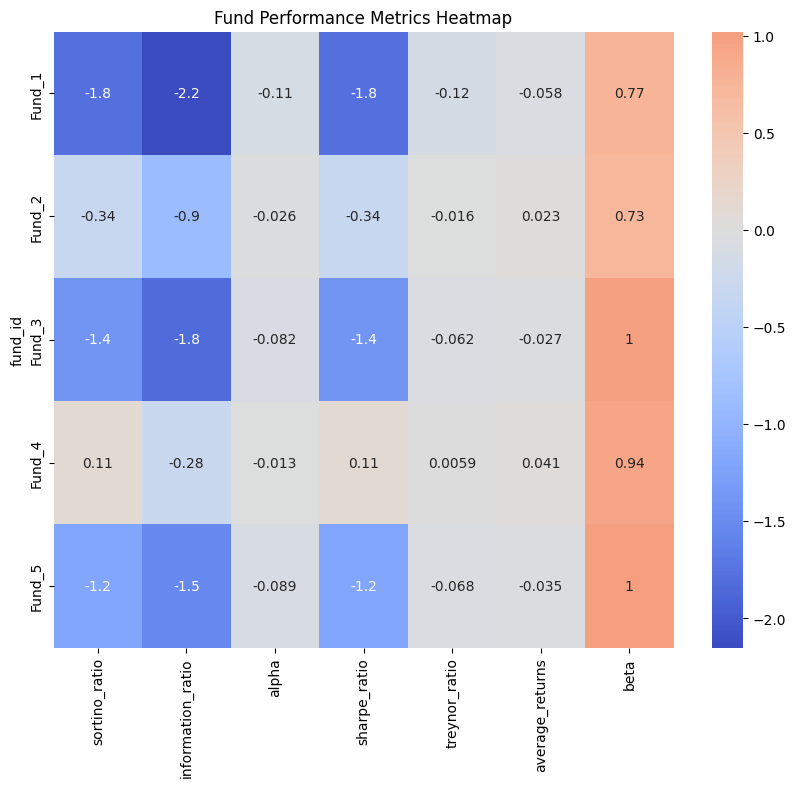

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    'sortino_ratio': [-1.780486, -0.339249, -1.403464, 0.114523, -1.201978],
    'information_ratio': [-2.150927, -0.897053, -1.837172, -0.283415, -1.535311],
    'alpha': [-0.107624, -0.025827, -0.081754, -0.012588, -0.089281],
    'sharpe_ratio': [-1.780486, -0.339249, -1.403464, 0.114523, -1.201978],
    'treynor_ratio': [-0.120472, -0.016079, -0.062454, 0.005909, -0.068230],
    'average_returns': [-0.057763, 0.023262, -0.027454, 0.040554, -0.034595],
    'beta': [0.77, 0.73, 1.00, 0.94, 1.02],
    'fund_id': ['Fund_1', 'Fund_2', 'Fund_3', 'Fund_4', 'Fund_5']
}

# Create DataFrame
df = pd.DataFrame(data)

# Set 'fund_id' as the index
df.set_index('fund_id', inplace=True)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap='coolwarm', center=0)
plt.title('Fund Performance Metrics Heatmap')
plt.show()

In [ ]:
# Load the uploaded file
df = merged_df

import matplotlib.pyplot as plt

# Calculate the 5-year average performance for each fund (assuming 'average_returns' is the metric of interest)
average_performance = df['average_returns']

# Plot a histogram to visualize the distribution of the 5-year average performances
plt.figure(figsize=(10, 6))
plt.hist(average_performance, bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of 5-Year Average Returns for 50 Funds')
plt.xlabel('5-Year Average Return')
plt.ylabel('Number of Funds')
plt.grid(True)
plt.show()

# Plot a box plot to see the spread and identify any outliers
plt.figure(figsize=(8, 6))
plt.boxplot(average_performance, vert=False, patch_artist=True)
plt.title('Box Plot of 5-Year Average Returns for 50 Funds')
plt.xlabel('5-Year Average Return')
plt.grid(True)
plt.show()

# Rank the funds based on their 5-year average performance
df['rank'] = df['average_returns'].rank(ascending=False)

# Categorize the funds into quartiles
df['quartile'] = pd.qcut(df['average_returns'], 4, labels=['Q4 (Bottom 25%)', 'Q3', 'Q2', 'Q1 (Top 25%)'])

# Display the DataFrame with ranks and quartiles
df_sorted = df.sort_values(by='average_returns', ascending=False)
df_sorted[['fund_id', 'average_returns', 'rank', 'quartile']]


KeyError: 'average_returns'

In [ ]:
import pandas as pd
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

# Load your data into a DataFrame (if not already done)
# Assuming df is the DataFrame with the panel data

# Set the index to be a MultiIndex with fund_id and year
df.set_index(['fund_id', 'year'], inplace=True)

# Specify the model
# 'average_returns' is the dependent variable
# 'sharpe_ratio', 'alpha', 'information_ratio', 'sortino_ratio', 'treynor_ratio' are independent variables
exog_vars = ['sharpe_ratio', 'alpha', 'information_ratio', 'sortino_ratio', 'treynor_ratio']
exog = sm.add_constant(df[exog_vars])
mod = PanelOLS(df['average_returns'], exog, entity_effects=True)

# Fit the model
fe_res = mod.fit()

# Display the results
print(fe_res)


KeyError: "None of ['fund_id', 'year'] are in the columns"